In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Clustered_Data.csv')
df.head()



,Unnamed: 0,pH,EC,OC,N,P,K,S,Zn,Fe,Cu,Mn,Target
0,0,7.9,0.13,0.54,375.3,19.52,267.31,9.65,0.68,7.18,0.28,2.36,0
1,1,7.6,0.13,0.48,333.6,24.77,297.26,7.00,0.66,8.22,0.36,2.40,2
2,2,7.5,0.14,0.40,278.0,24.02,276.30,10.25,0.64,8.24,0.34,2.42,2
3,3,7.3,0.15,0.50,347.5,17.26,223.60,6.75,0.66,7.36,0.26,2.56,0
4,4,6.9,0.15,0.44,305.8,16.51,269.10,8.23,0.68,7.28,0.30,2.60,2


In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
df.drop(['Target'], axis=1, inplace=True)

In [7]:
from sklearn.decomposition import PCA 
  
pca = PCA(3) 
pca.fit(df) 
  
pca_data = pd.DataFrame(pca.transform(df)) 
  
print(pca_data.head())

           0          1         2
0  62.090957  16.242420  2.156878
1  92.002619 -25.460980  7.354080
2  70.991776 -81.038125  7.243113
3  18.356314 -11.536165 -0.233029
4  63.818296 -53.277867 -0.590351


In [8]:
from matplotlib import colors as mcolors 
import math 
   
''' Generating different colors in ascending order  
                                of their hsv values '''
colors = list(zip(*sorted(( 
                    tuple(mcolors.rgb_to_hsv( 
                          mcolors.to_rgba(color)[:3])), name) 
                     for name, color in dict( 
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS 
                                                      ).items())))[1] 
   
   
# number of steps to taken generate n(clusters) colors 
clusters = 3
skips = math.floor(len(colors[5 : -5])/clusters) 
cluster_colors = colors[5 : -5 : skips] 

In [9]:
X = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]].values
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

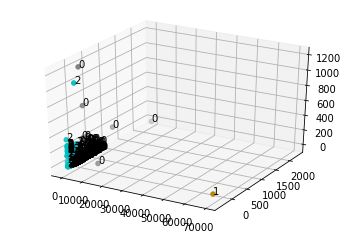

In [12]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
   
fig = plt.figure() 
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeans.labels_))) 
   
str_labels = list(map(lambda label:'% s' % label, kmeans.labels_)) 
   
list(map(lambda data1, data2, data3, str_label: 
        ax.text(data1, data2, data3, s = str_label, size = 10, 
        zorder = 20, color = 'k'), pca_data[0], pca_data[1], 
        pca_data[2], str_labels)) 
   
plt.show() 


In [13]:
from sklearn.decomposition import PCA 
  
pca1 = PCA(2) 
pca1.fit(df) 
  
pca_data1 = pd.DataFrame(pca1.transform(df)) 
  
print(pca_data1.head())

           0          1
0  62.090957  16.242420
1  92.002619 -25.460980
2  70.991776 -81.038125
3  18.356314 -11.536165
4  63.818296 -53.277867


In [14]:
pca_1 = pca_data1.iloc[:,[0,1]].values


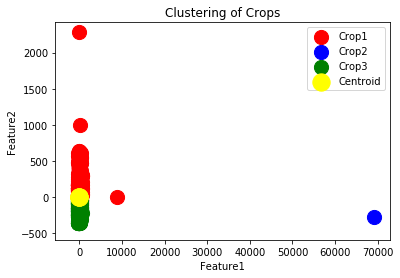

In [16]:
plt.scatter(pca_1[y_kmeans==0, 0], pca_1[y_kmeans==0, 1], s=200, c='red', label='Crop1')
plt.scatter(pca_1[y_kmeans==1, 0], pca_1[y_kmeans==1, 1], s=200, c='blue', label='Crop2')
plt.scatter(pca_1[y_kmeans==2, 0], pca_1[y_kmeans==2, 1], s=200, c='green', label='Crop3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroid')
plt.title('Clustering of Crops')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()